<a href="https://colab.research.google.com/github/wet-meadow/learn/blob/main/02_python_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intermediate Python

With an understanding of basic Python programming, it becomes easy to construct more complex applications that tackle real world problems.

##Classes

Classes are a way to structure data and functions that manipulate that data. Every class is a new data type comprised of other data types. Many tools use classes to make importing and sharing code between applications easier. The syntax for defining classes in Python is straightforward:

In [ ]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}'.format(self.name.upper()))
        else:
          print('Hello, {}!'.format(self.name))

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred!
HELLO, FRED


##Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [ ]:
import numpy as np

###Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b.shape)
print(b)

(2, 3)
[[1 2 3]
 [4 5 6]]


In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.29006044 0.55244121]
 [0.585751   0.29457253]]


###Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)


[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])
print(a)
bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[1 2]
 [3 4]
 [5 6]]
[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

###Datatypes

Unlike basic lists, every numpy array is a grid of elements of the same, specific, type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


Numpy does a fairly good job of guessing the correct datatype for your work. However, when performing complex operations or operations sensitie to overflow or underflow errors, it may become neccesary to specifically define which datatype you want to use. You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

###Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0. 0.]
 [0. 0.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

[ 99 120]
219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [ ]:
print(v @ w)

219


In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


###Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [ ]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

##Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [ ]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

###Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4]


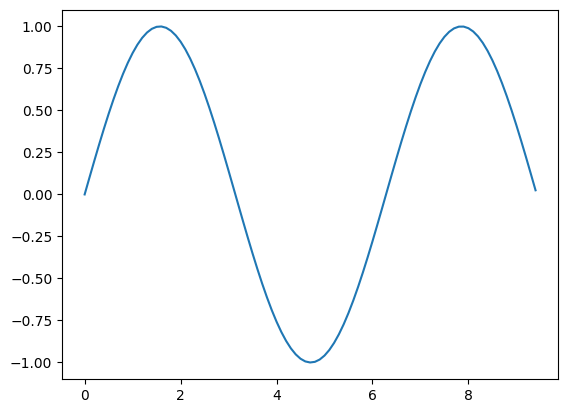

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

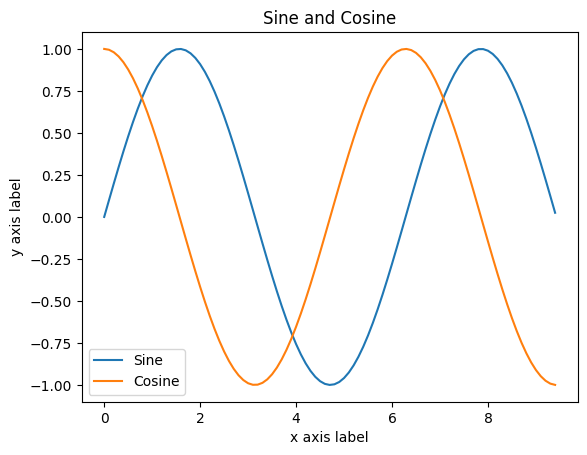

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

###Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

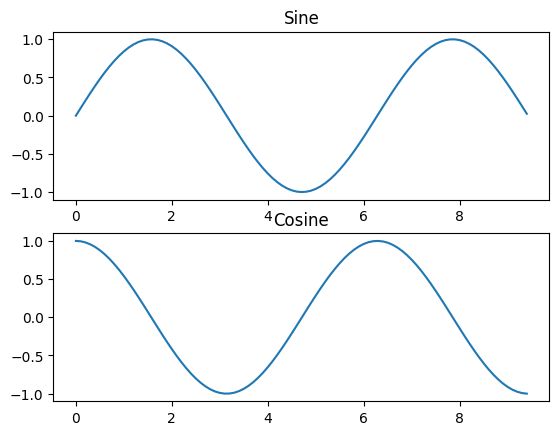

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

##Pandas
Pandas is similar to Numpy in that it provides data structures. However, its focus is strictly on data analysis instead of scientific computation. The most widly used of these data structures are the Series and DataFrame.

###Series

Series is one dimensional data structure similar to a list. It consists of a single column of any datatype.

In [ ]:
import pandas as pd

obj=pd.Series([1,"John",3.5,"Hey"])
print(obj)

0       1
1    John
2     3.5
3     Hey
dtype: object


###Data Frame
Data frame is a two-dimensional data structure consisting of rows and columns. It is similar to the Numpy array or a traditional matrix but can have multiple data types.

The built in Pandas tools make manipulating and displaying this data considerably easier than using traditional dictonaries.

In [ ]:
df = pd.DataFrame(
    {"name" :["Bill","Tom","Tim","John","Alex","Vanessa","Kate"],
     "score":[90,80,85,75,95,60,65],
     "sport":["Wrestling","Football","Skiing","Swimming","Tennis","Karete","Surfing"],
     "sex":["M","M","M","M","F","F","F"]}
)
print(df)

      name  score      sport sex
0     Bill     90  Wrestling   M
1      Tom     80   Football   M
2      Tim     85     Skiing   M
3     John     75   Swimming   M
4     Alex     95     Tennis   F
5  Vanessa     60     Karete   F
6     Kate     65    Surfing   F


Data access is similar to the way dictionaries access data but with more composable options.

In [ ]:
print(df['name'])

0       Bill
1        Tom
2        Tim
3       John
4       Alex
5    Vanessa
6       Kate
Name: name, dtype: object


In [ ]:
print(df[
    ['name', 'score']
])

      name  score
0     Bill     90
1      Tom     80
2      Tim     85
3     John     75
4     Alex     95
5  Vanessa     60
6     Kate     65


Dataframes can be reordered or reformatted using the columns attribute in the constructor.

In [ ]:
df=pd.DataFrame(df,columns=["name","sport","sex","score"])
print(df)

      name      sport sex  score
0     Bill  Wrestling   M     90
1      Tom   Football   M     80
2      Tim     Skiing   M     85
3     John   Swimming   M     75
4     Alex     Tennis   F     95
5  Vanessa     Karete   F     60
6     Kate    Surfing   F     65


In [ ]:
df=pd.DataFrame(df,columns=["name","sport","score"])
print(df)

      name      sport  score
0     Bill  Wrestling     90
1      Tom   Football     80
2      Tim     Skiing     85
3     John   Swimming     75
4     Alex     Tennis     95
5  Vanessa     Karete     60
6     Kate    Surfing     65


Dataframes also allow partial frame traversial when dealing with large or unruly datasets.

In [ ]:
print(df.head(2))

   name      sport  score
0  Bill  Wrestling     90
1   Tom   Football     80


In [ ]:
print(df.tail(2))

      name  score    sport sex
5  Vanessa     60   Karete   F
6     Kate     65  Surfing   F


Dataframes can then be manipulated using many builtin functions similar to Numpy.

In [ ]:
print(df.T)

               0         1       2         3       4        5        6
name        Bill       Tom     Tim      John    Alex  Vanessa     Kate
score         90        80      85        75      95       60       65
sport  Wrestling  Football  Skiing  Swimming  Tennis   Karete  Surfing
sex            M         M       M         M       F        F        F


In [ ]:
print(df["name"])

0       Bill
1        Tom
2        Tim
3       John
4       Alex
5    Vanessa
6       Kate
Name: name, dtype: object


For more information on the availaible operations that can be performed on dataframes, see the [documentation](https://pandas.pydata.org/docs/user_guide/10min.html#operations).

###Plotting

Pandas uses Matplotlib directly to simplify plotting of data. Dataframes can be plotted directly using builtin functions.

<Figure size 640x480 with 0 Axes>

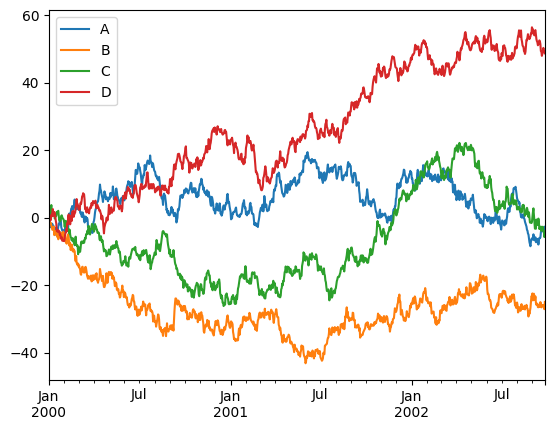

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');

## Scikit-learn
[Scikit-learn](https://scikit-learn.org/stable/index.html) is a library built on top of Numpy and Matplotlib to provide 'simple and efficient tools for predictive data analysis.' It can be used to quickly perofm calculations such as:

*   Regression
*   Clustering
*   Dimensionality reduction
*   Classification
*   Model selection

We will discuss several examles of these common problems here as background information while later discussions will discuss these concepts in more depth. It is not neccesary to understand the underlying mathematics of the different algorithms; only realize that they exist and can be used to evaluate data.

More information on Scikit-learn can be found at the [documentation](https://scikit-learn.org/stable/user_guide.html) webpage and more useful examples can be found on the [examples](https://scikit-learn.org/stable/auto_examples/index.html) webpage.

A word of caution for Apple users: currently, Scikit-learn does not support M1 processors without a considerable amount of work. If you are interested in using scikit-learn with M1 processors you will likely need to install and use the Conda Python distribution.

In [ ]:
# Ensure that scikit-learn is installed and up to date
!python -m pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Regression
Regression analysis is a statistical method used to estimate the relationship between variables. Regression can show the magnitude of an association (i.e., how much a change in one variable impacts another) as well as the statistical signficance of the association (i.e., the chance that the association has happened randomly).

The most common regression algorithms fall into the linear regression category. These algorithms include:


*   Ordinary least squares
*   Bayesian Regression
*   RANdom SAmple Consensus (RANSAC)

The following is a complilation of samples taken from the [Scikit-learn examples](https://scikit-learn.org/stable/auto_examples/index.html#generalized-linear-models) and demonstrates the comparison of several regression algorithms on a sample dataset.

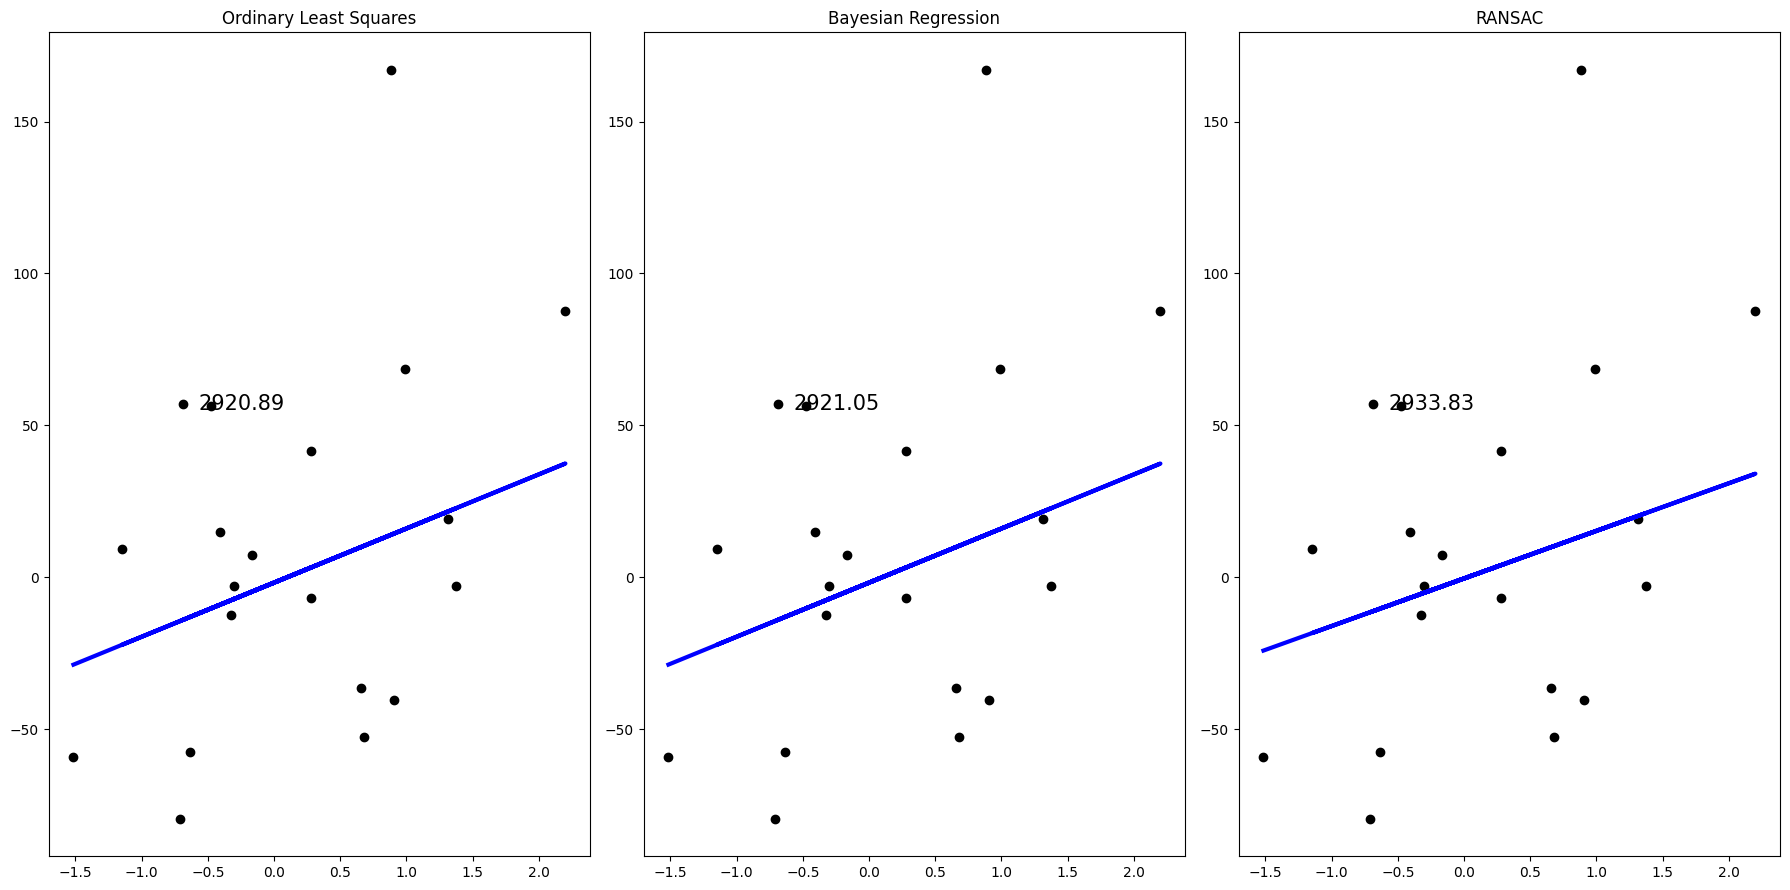

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, ensemble
from sklearn.metrics import mean_squared_error

# Define the human readable algorithm names
names = [
    "Ordinary Least Squares",
    "Bayesian Regression",
    "RANSAC"
]

# Define the acutal classifier algorithms
models = [
    linear_model.LinearRegression(),
    linear_model.BayesianRidge(),
    linear_model.RANSACRegressor()
]

# Create a dataset
X, y, coef = datasets.make_regression(
    n_samples=10000,
    n_features=1,
    n_informative=1,
    noise=50,
    coef=True
)
np.random.seed(0)
X[:200] = 3 + 0.5 * np.random.normal(size=(200, 1))
y[:200] = -3 + 10 * np.random.normal(size=200)

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# Execute each algorithm on the dataset
figure = plt.figure(figsize=(18, 9))
for index, regr in enumerate(models):
  # Train the model using the training sets
  regr.fit(X_train, y_train)

  # Make predictions using the testing set
  y_pred = regr.predict(X_test)

  # Draw the results
  x_max = X_test[:].max() + 0.5
  y_min = y_test[:].min() - 0.5

  ax = plt.subplot(1, len(models), index+1)
  ax.scatter(X_test, y_test, color="black")
  ax.plot(X_test, y_pred, color="blue", linewidth=3)
  ax.set_title(names[index])
  ax.text(
      0.08,
      55,
      ("%.2f" % mean_squared_error(y_test, y_pred)).lstrip("0"),
        size=15,
        horizontalalignment="right",
  )

# Show the results
plt.tight_layout()
plt.show()

### Clustering
Clustering is a technique used to group similar data points together based on their intrinsic characteristics or patterns. The algorithm attempts to find groups of points, or clusters, that are similar to eachother but dissimilar to points in other clusers. Clustering algorithms attempt to optimize the clusters by iteratively assigning data points to clusters and updating the cluster centroids or boundaries.

Similarity can be any function that accurately describes the point and can be compared. It is generally the Euclidean distance between points or cosine similarity.

Some of the most common clustering algorithms include:

*   K-means
*   Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
*   Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH)

The following is a complilation of samples taken from the [Scikit-learn examples](https://scikit-learn.org/stable/auto_examples/index.html#clustering) and demonstrates the comparison of several clutering algorithms on a sample dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


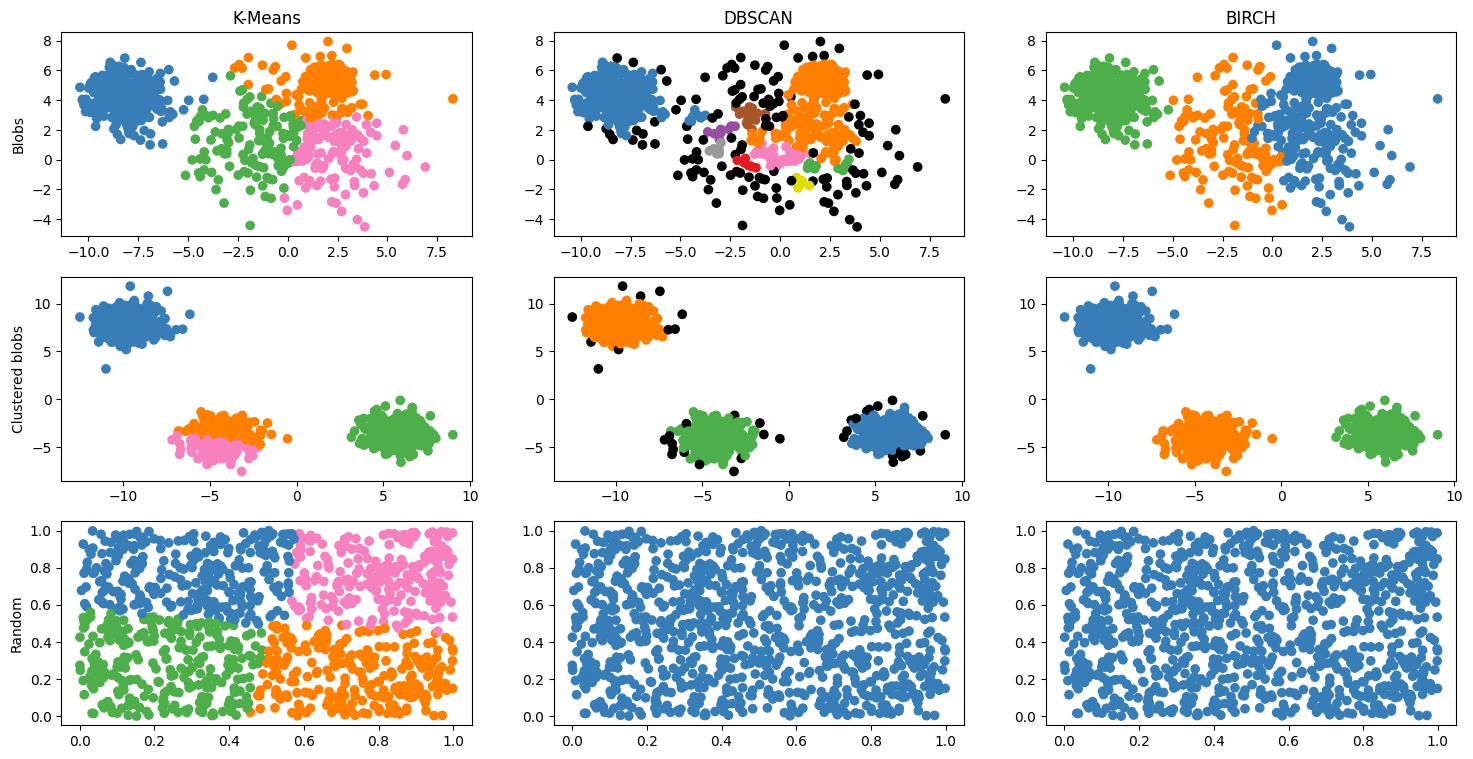

In [ ]:
from itertools import cycle, islice
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# Define some ideas about the data
n_clusters = 4

# Define the human readable algorithm names
names = [
    "K-Means",
    "DBSCAN",
    "BIRCH"
]

# Define the acutal classifier algorithms
models = [
    cluster.MiniBatchKMeans(n_clusters=n_clusters, n_init="auto"),
    cluster.DBSCAN(),
    cluster.Birch()
]

# Generate some data
n_samples = 1000
np.random.seed(0)

data_names = [
    "Blobs",
    "Clustered blobs",
    "Random"
]
datasets = [
  datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=np.random.randint(1, 255)
  ),
  datasets.make_blobs(
    n_samples=n_samples, random_state=np.random.randint(1, 255)
  ),
  (np.random.rand(n_samples, 2), None)
]

# Iterate over the sample datasets and append the results to the output plot
figure = plt.figure(figsize=(18, 9))
for data_index, dataset in enumerate(datasets):
  X, y = dataset

  for model_index, model in enumerate(models):
    model.fit(X)

    if hasattr(model, "labels_"):
      y_pred = model.labels_.astype(int)
    else:
      y_pred = model.predict(X)

    colors = np.array(
      list(
        islice(
          cycle(
            [
              "#377eb8",
              "#ff7f00",
              "#4daf4a",
              "#f781bf",
              "#a65628",
              "#984ea3",
              "#999999",
              "#e41a1c",
              "#dede00",
            ]
          ),
          int(max(y_pred) + 1),
        )
      )
    )
    colors = np.append(colors, ["#000000"])

    ax = plt.subplot(
        len(datasets), len(models),
         (data_index * len(datasets)) + model_index + 1)
    ax.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

    if data_index == 0:
      ax.set_title(names[model_index])

    if model_index == 0:
      ax.set_ylabel(data_names[data_index])

plt.show()

### Classification
Classification is the process of predicting the class or category of data based on previous data that has been *labled*. With a sufficiently large labled data set, it becomes possible to predict which category new data will fall into without human intervention. Several different algorithms exist to address the classification problem and the best approach will depend on the data being classified. Most of the time, it will be neccesary to try several different algorithms to find the most appropriate.

The following example is taken from the [Scikit-learn examples](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py) and demonstrates the comparision of several classification algorithms on a sample dataset.



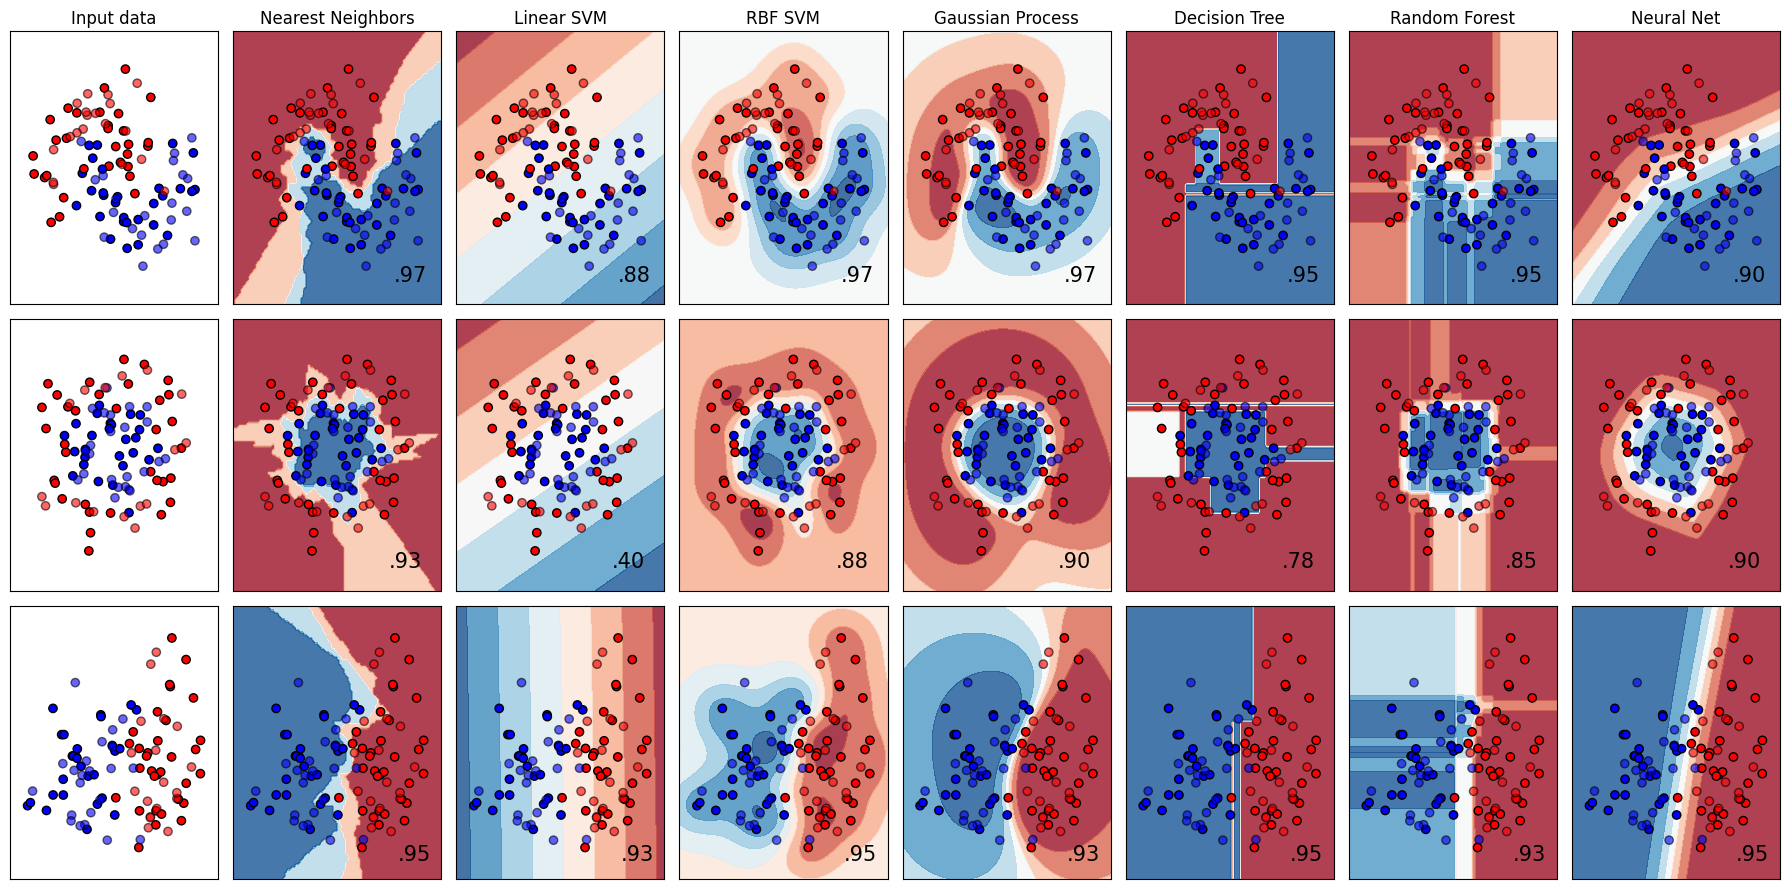

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

# Define human readable titles for each classifier
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net"
]

# Define the acutal classifier algorithms
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000)
]

# Generate the sample data
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

# Iterate over the sample datasets and append the results to the output plot
figure = plt.figure(figsize=(18, 9))
i = 1
for ds_cnt, ds in enumerate(datasets):
    # Preprocess the current dataset
    # Split into training and test sets
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Plot the dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # Plot the training points then the test points
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over each classifier for the dataset
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

# Show the results
plt.tight_layout()
plt.show()

### Dimensionality Reduction

Dimensionality reduction is a process that attempts to reduce the number of input features or variables in a dataset while preserving important information. It involves transforming a high-dimensional dataset into a lower-dimensional representation while minimizing the loss of relevant information.

High-dimensional datasets can present challenges such as increased computational complexity, increased storage requirements, and decreased model performance due to the sparsity of data. By reducing the dimensionality of the data, the efficiency and effectiveness of various tasks, including visualization, data exploration, and machine learning can be improved.

Some of the most common techniques for dimensionality reduction include:


*   Principal Component Analysis (PCA)
*   t-Distributed Stochastic Neighbor Embedding (TSNE)

The following example uses the Iris dataset. This dataset includes 4 dimensions:

*   Sepal length (in centimeters)
*   Sepal width (in centimeters)
*   Petal length (in centimeters)
*   Petal width (in centimeters)

The example attempts to reduce the number of parameters from 4 to 2. The different colors of the dots indicate the species of iris flowers. By examining the separation of colors or clusters in each subplot, we can assess how well the dimensionality reduction techniques capture the underlying patterns or structures in the Iris dataset.

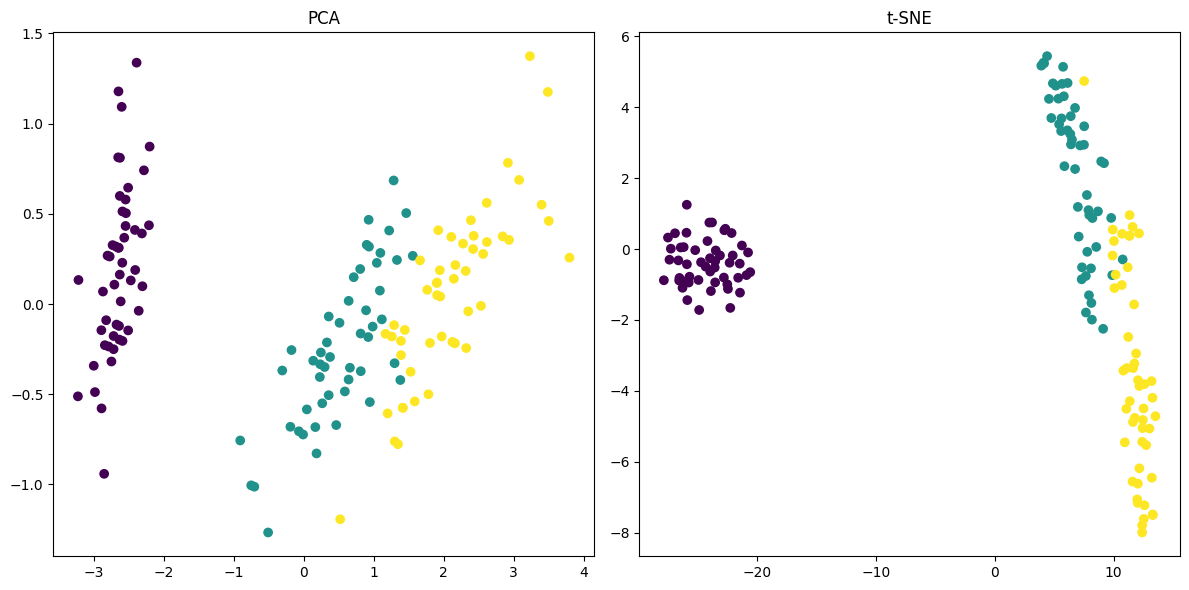

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA')

plt.subplot(122)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE')

plt.tight_layout()
plt.show()

### Model Selection

As the preivous sections have demonstrated, there are a variety of techniques and algorithms for evaluating data and generating learnings from it. It, therefore, becomes neccesary to have methods for comparing and evaluating the performance of the myriad of algorithms and their various options.

The `cross_val_score` tool can be used to evaluate the performance of different regression models based on some metric and compare them to one another. Which metric is chosen is dependent on the type of data and the desired algorithm chosen. More information on model selection can be found in the [documentation](https://scikit-learn.org/stable/model_selection.html#model-selection).

In the following example, a selection of classification algorithms are run against the iris dataset. Their accuracy is then measured and compared.




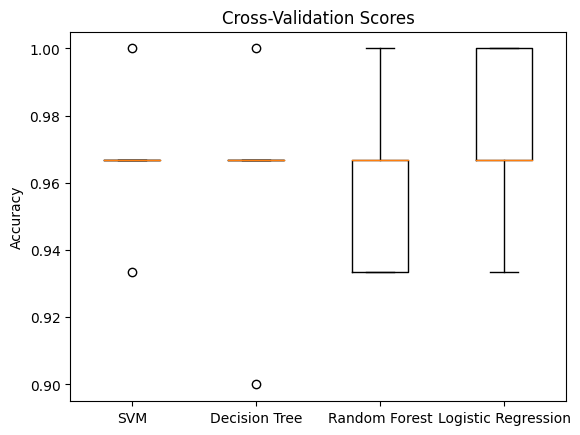

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the classification algorithms
classifiers = {
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=500)
}

# Perform cross-validation and collect scores
scores = []
labels = []
for classifier_name, classifier in classifiers.items():
    score = cross_val_score(classifier, X, y, cv=5)
    scores.append(score)
    labels.append(classifier_name)

# Plot the results in a box plot
plt.boxplot(scores, labels=labels)
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()


With default parameters, the Random Forest algorithm (arguably) performs the best. We can then use this technique to optimize the parameters of the algorithm.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameters we want to optimize
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the classifier object
classifier = RandomForestClassifier()

# Load the data and get the base score
iris = load_iris()
X = iris.data
y = iris.target

base_score = cross_val_score(classifier, X, y, cv=5)

# Perform a grid search on the parameters
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X, y)

# Get the resulting value
print(f"Original Score: {base_score.mean()}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")


Original Score: 0.9533333333333334
Best Score: 0.9666666666666668
Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


Unfortunately, this model can't be improved even after our parameter search. We can evaluate teh performance of another model.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameters we want to optimize
param_grid = {
  'penalty': ['l1', 'l2'],
  'C': [0.1, 1, 10],
  'solver': ['liblinear', 'saga', 'newton-cholesky'],
}

# Create the classifier object
classifier = LogisticRegression(max_iter=5000)

# Load the data and get the base score
iris = load_iris()
X = iris.data
y = iris.target

base_score = cross_val_score(classifier, X, y, cv=5)

# Perform a grid search on the parameters
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X, y)

# Get the resulting value
print(f"Original Score: {base_score.mean()}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")


Original Score: 0.9733333333333334
Best Score: 0.9800000000000001
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

We can now compare the optimised version of the regression algorithm with the other algorithms.

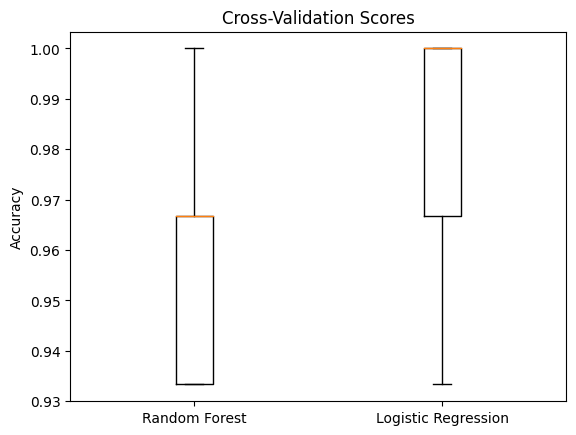

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the classification algorithms
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(C=10, max_iter=2000, solver='liblinear', penalty='l1')
}

# Perform cross-validation and collect scores
scores = []
labels = []
for classifier_name, classifier in classifiers.items():
    score = cross_val_score(classifier, X, y, cv=5)
    scores.append(score)
    labels.append(classifier_name)

# Plot the results in a box plot
plt.boxplot(scores, labels=labels)
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()